In [1]:
!pip install threadpoolctl==3.1.0


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from scipy.spatial.distance import cdist

df=pd.read_excel('Adidas US Sales Datasets.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [3]:
# Data cleaning 
df=df.drop([0,1,2],axis=0)
df=df.drop('Unnamed: 0',axis=1)
df=df.reset_index()
df.head()

,index,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [4]:
df=df.drop('index',axis=1)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [5]:
headers=df.iloc[0]

df.columns=headers
df=df.drop(labels=0,axis=0)
df=df.reset_index()
df.head()

,index,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [6]:
df=df.drop(['index'],axis=1)

In [7]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [8]:
df.describe()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [10]:
#SAVED_LOCATION="D:/adidas_clean_data.xlsx"
#df.to_excel(SAVED_LOCATION,index=False,na_rep='N/A')

## Retailer Geographic Segmentation

Text(0.5, 1.0, 'Cluster Visualisation ')

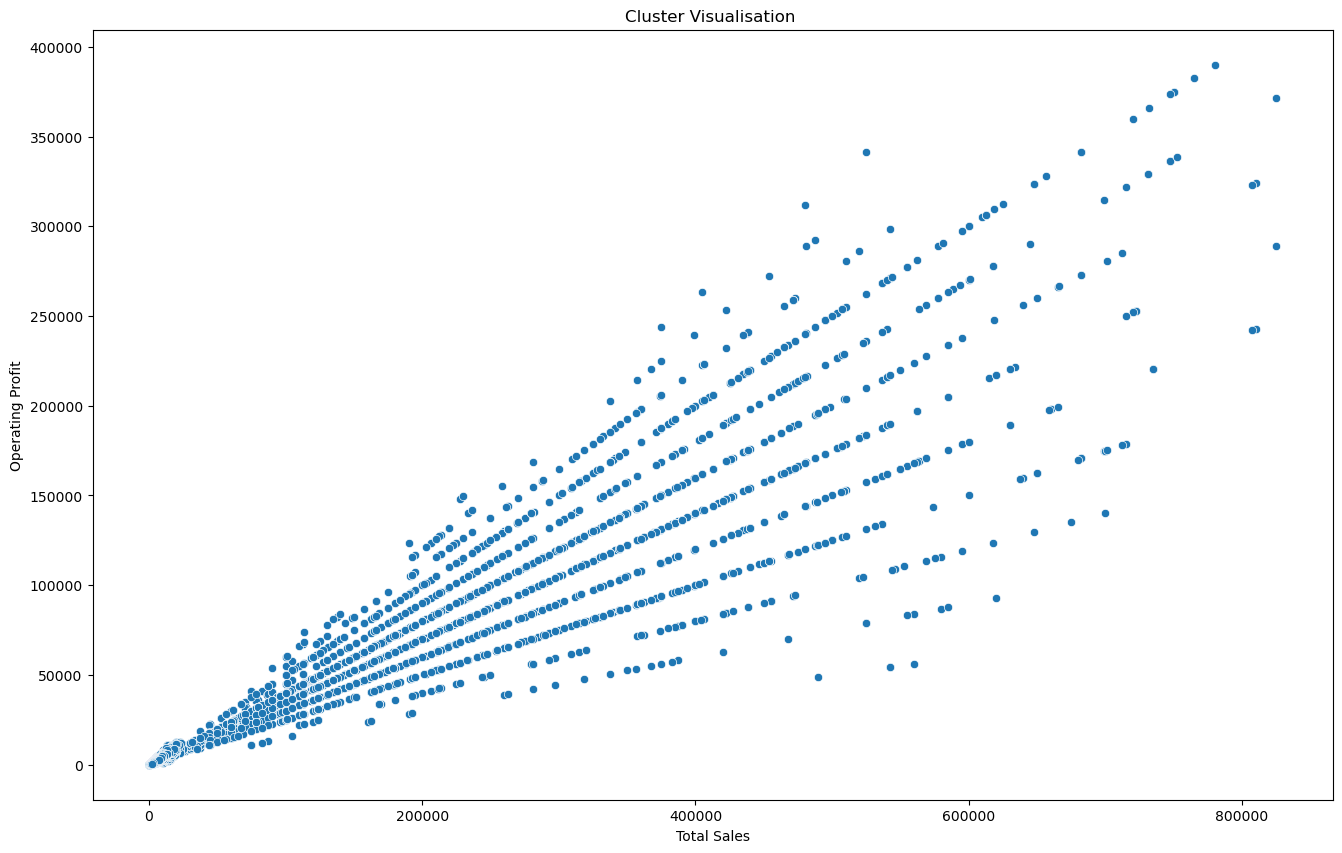

In [11]:
# Scatterplot for total sales and operating profit to see the distribution
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x='Total Sales', y='Operating Profit', data=df)
ax.set_xlabel('Total Sales')
ax.set_ylabel('Operating Profit')
ax.set_title('Cluster Visualisation ')

In [12]:
df.isnull().sum()

0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [13]:
#Reading object columns as string 
str_cols=['Retailer','Region','State','City','Product','Sales Method']
for col in str_cols:
    df[col]=df[col].astype(str)

In [14]:
#convert numerical columns into float data type
num_cols=['Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin']
for col in num_cols:
    df[col]=df[col].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   object 
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   float64
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(5), object(8)
memory usage: 980.0+ KB


In [16]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store


In [17]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [18]:
df.rename(columns={'Total Sales':'Total_Sales','Operating Profit':'Operating_Profit'},inplace=True)

In [19]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store


In [20]:
df_segment = df[['Total_Sales','Operating_Profit']]
max_k = 15
# ## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(df_segment) >= i:
        model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        model.fit(df_segment)
        distortions.append(model.inertia_)

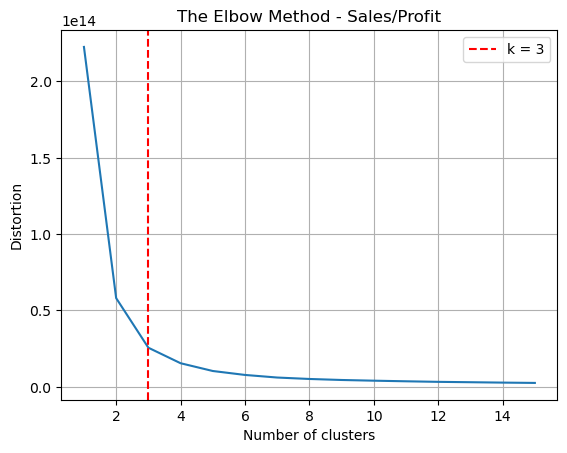

In [21]:
k = 3
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method - Sales/Profit', xlabel='Number of clusters', 
        ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [22]:
kmeans_segment = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
y_pred = kmeans_segment.fit_predict(df[['Total_Sales','Operating_Profit']])
df['cluster'] = y_pred
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method,cluster
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1


In [23]:
df['cluster'].value_counts()

0    6744
2    2058
1     846
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Cluster Visualisation ')

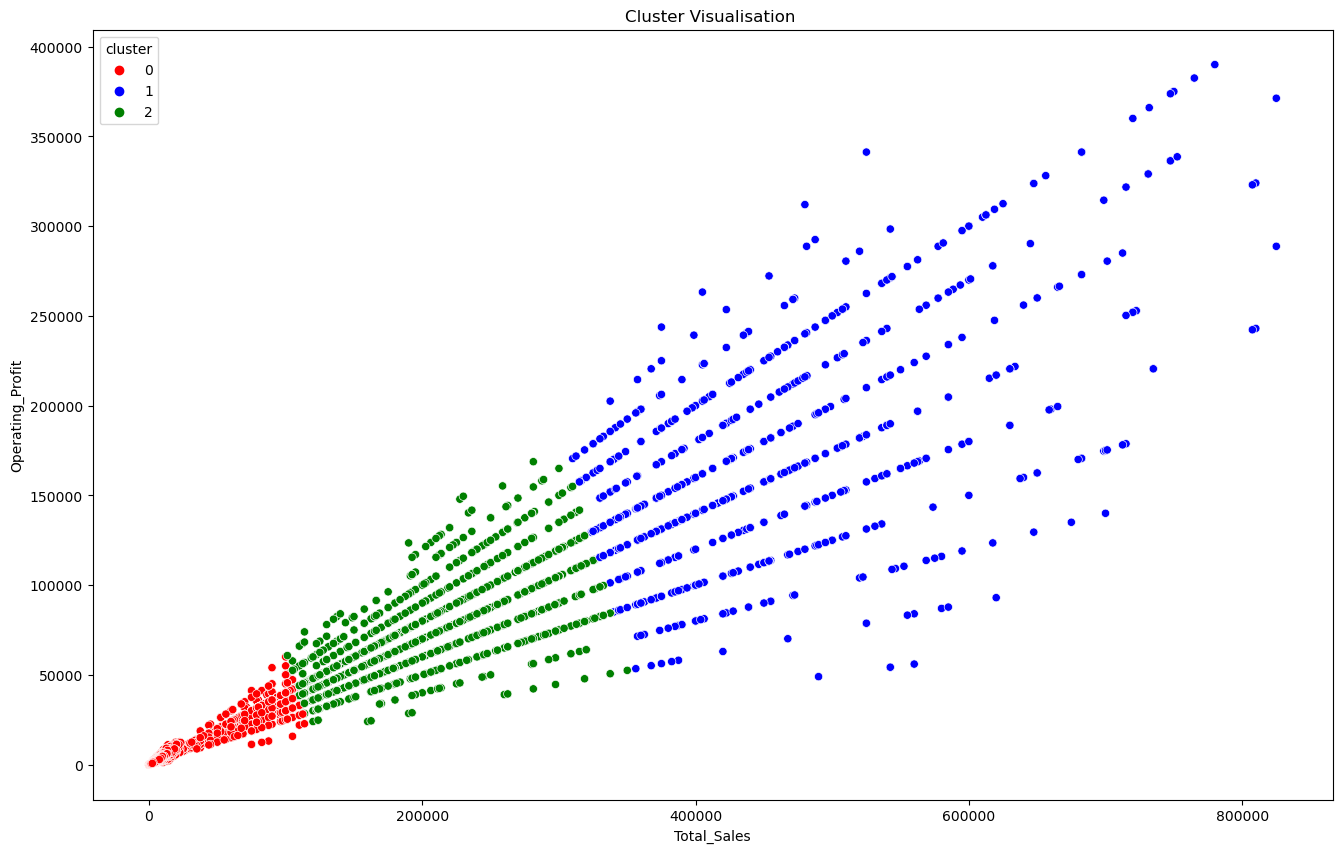

In [24]:
colors=['red','blue','green']
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x='Total_Sales', y='Operating_Profit', hue='cluster', palette=colors, data=df)
ax.set_xlabel('Total_Sales')
ax.set_ylabel('Operating_Profit')
ax.set_title('Cluster Visualisation ')

In [25]:
df[df['cluster']==0].describe()

,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,cluster
count,6744.000000,6744.000000,6744.000000,6744.000000,6744.000000,6744.0
mean,42.038849,143.091785,15173.765569,5896.066719,0.447200,0.0
std,13.864238,75.202222,24735.009903,8726.413013,0.092823,0.0
min,7.000000,0.000000,0.000000,0.000000,0.120000,0.0
25%,33.000000,85.000000,3234.000000,1451.250000,0.390000,0.0
50%,41.000000,133.000000,5839.000000,2657.360000,0.450000,0.0
75%,51.000000,189.000000,10504.000000,4872.017500,0.500000,0.0
max,103.000000,700.000000,113750.000000,60000.000000,0.800000,0.0


In [26]:
df[df['cluster']==1].describe()

,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,cluster
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.0
mean,62.458629,736.347518,450352.245863,167056.456856,0.372813,1.0
std,13.415793,158.378671,104127.945483,58931.136906,0.100087,0.0
min,35.000000,400.000000,310000.000000,49000.000000,0.100000,1.0
25%,55.000000,625.000000,371250.000000,129500.000000,0.300000,1.0
50%,60.000000,725.000000,425000.000000,157500.000000,0.350000,1.0
75%,70.000000,825.000000,500000.000000,195828.125000,0.450000,1.0
max,110.000000,1275.000000,825000.000000,390000.000000,0.650000,1.0


In [27]:
df[df['cluster']==2].describe()

,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,cluster
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0
mean,48.542274,432.896016,202416.059281,73392.577745,0.364286,2.0
std,11.987208,135.808477,60320.570202,25977.416231,0.074445,0.0
min,15.000000,175.000000,101250.000000,24000.000000,0.150000,2.0
25%,40.000000,325.000000,150000.000000,52500.000000,0.300000,2.0
50%,50.000000,425.000000,195000.000000,70000.000000,0.350000,2.0
75%,55.000000,525.000000,250000.000000,90000.000000,0.400000,2.0
max,85.000000,925.000000,350000.000000,168750.000000,0.650000,2.0


## Clusters Definition

The naming convention is based on total sales and operating profit
0 = Low Performance
1 = High Performance
2 = Medium Performance

In [28]:
def area_segments(x):
    if x == 0:
        return "Low_Sales_Low_Profit"
    if x == 1:
        return "High_Sales_High_Profit"
    if x == 2:
        return "Moderate_Sales_Moderate_Profit"
    else:
        return "Undefined"

df["cluster_name"] = df["cluster"].apply(area_segments)

In [29]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method,cluster,cluster_name
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1,High_Sales_High_Profit
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1,High_Sales_High_Profit
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1,High_Sales_High_Profit
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1,High_Sales_High_Profit
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1,High_Sales_High_Profit


Text(0.5, 1.0, 'Cluster Visualisation ')

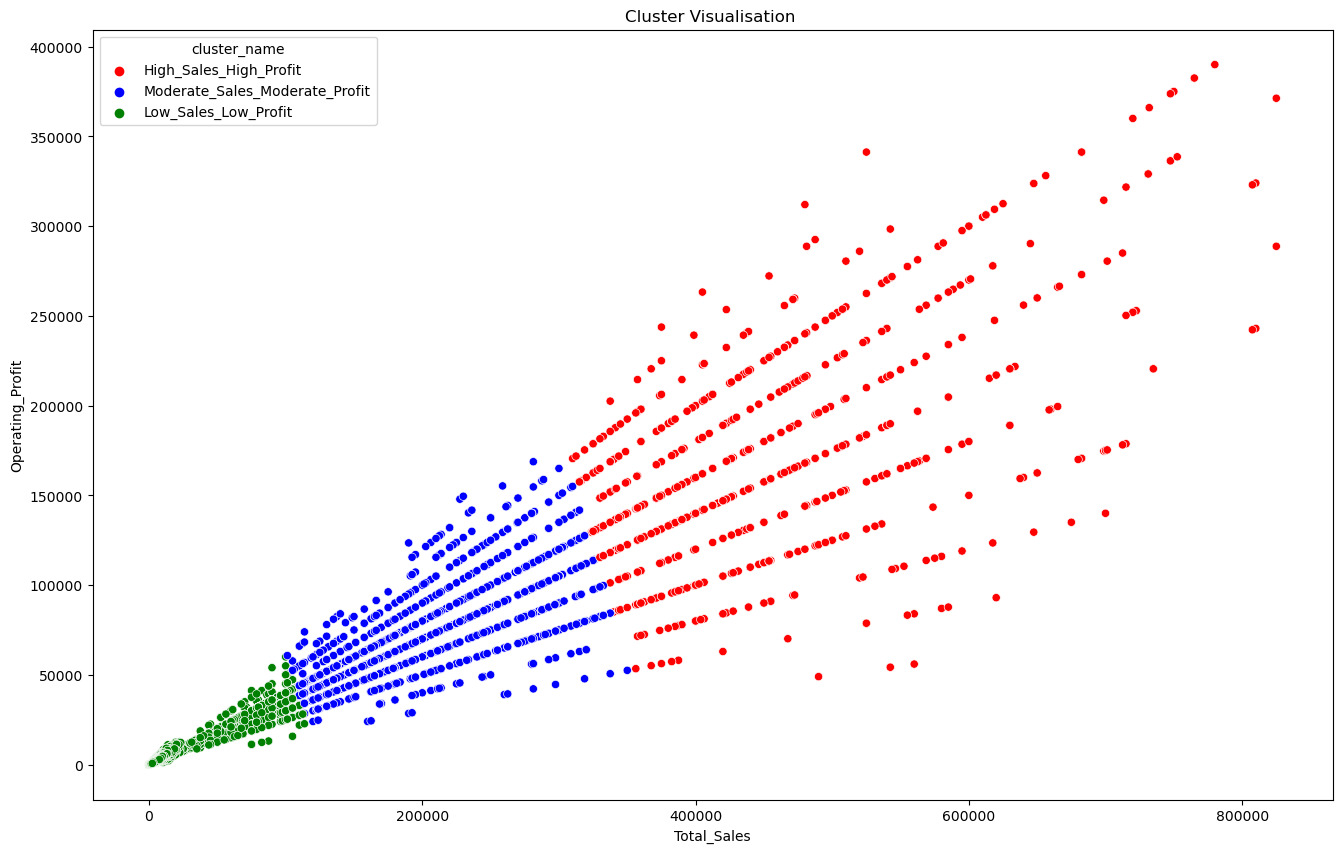

In [30]:
colors=['red','blue','green']
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x='Total_Sales', y='Operating_Profit', hue='cluster_name', palette=colors, data=df)
ax.set_xlabel('Total_Sales')
ax.set_ylabel('Operating_Profit')
ax.set_title('Cluster Visualisation ')

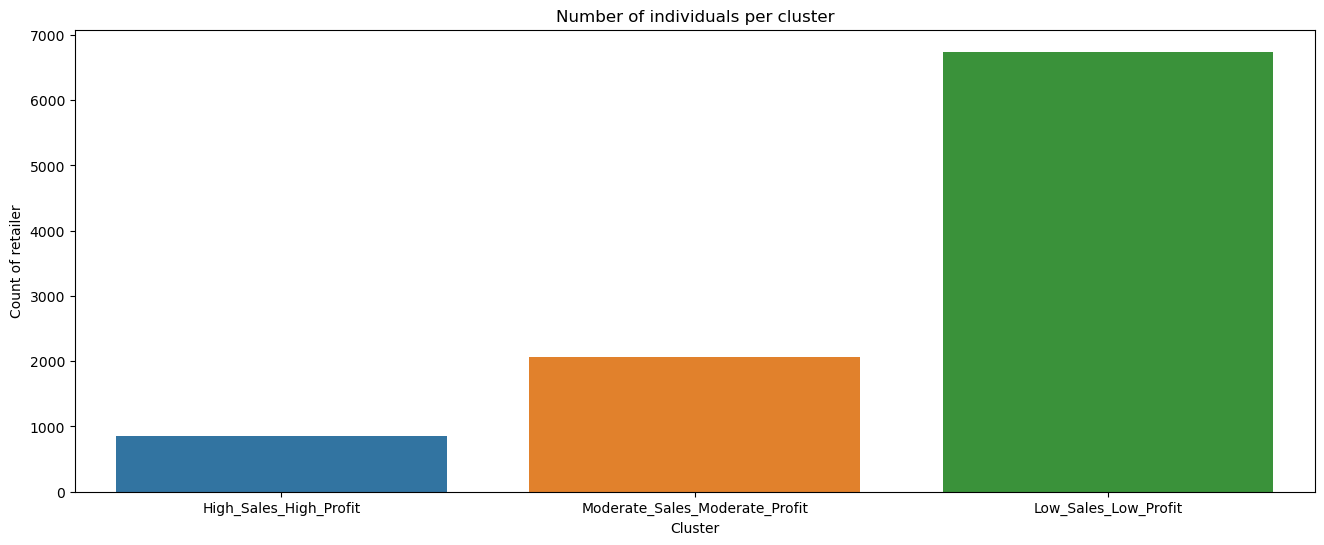

In [31]:
# Count number of individuals per cluster
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='cluster_name', data=df)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count of retailer')
ax.set_title('Number of individuals per cluster')

plt.show()

In [32]:
df['cluster_name'].value_counts()

Low_Sales_Low_Profit              6744
Moderate_Sales_Moderate_Profit    2058
High_Sales_High_Profit             846
Name: cluster_name, dtype: int64

In [33]:
df[(df['cluster_name']=='Low_Sales_Low_Profit') & (df['Retailer']=='West Gear')]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method,cluster,cluster_name
510,West Gear,1128299,2020-01-12 00:00:00,West,Nevada,Las Vegas,Men's Apparel,50.0,200.0,100000.0,55000.00,0.55,Outlet,0,Low_Sales_Low_Profit
575,West Gear,1128299,2020-03-18 00:00:00,West,Nevada,Las Vegas,Women's Athletic Footwear,40.0,275.0,110000.0,33000.00,0.30,In-store,0,Low_Sales_Low_Profit
576,West Gear,1128299,2020-03-19 00:00:00,West,Colorado,Denver,Men's Apparel,45.0,225.0,101250.0,50625.00,0.50,In-store,0,Low_Sales_Low_Profit
581,West Gear,1128299,2020-03-24 00:00:00,West,Colorado,Denver,Women's Athletic Footwear,40.0,275.0,110000.0,33000.00,0.30,In-store,0,Low_Sales_Low_Profit
582,West Gear,1128299,2020-03-25 00:00:00,West,Colorado,Denver,Men's Apparel,45.0,200.0,90000.0,45000.00,0.50,In-store,0,Low_Sales_Low_Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,West Gear,1197831,2021-10-21 00:00:00,South,Oklahoma,Oklahoma City,Men's Apparel,22.0,68.0,1496.0,568.48,0.38,Outlet,0,Low_Sales_Low_Profit
9554,West Gear,1185732,2021-10-12 00:00:00,Northeast,Vermont,Burlington,Women's Apparel,54.0,90.0,4860.0,2235.60,0.46,Outlet,0,Low_Sales_Low_Profit
9555,West Gear,1185732,2021-11-11 00:00:00,Northeast,Vermont,Burlington,Men's Street Footwear,54.0,140.0,7560.0,3780.00,0.50,Outlet,0,Low_Sales_Low_Profit
9556,West Gear,1185732,2021-11-11 00:00:00,Northeast,Vermont,Burlington,Men's Athletic Footwear,47.0,98.0,4606.0,2256.94,0.49,Outlet,0,Low_Sales_Low_Profit


In [34]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [35]:
segment_summary= df.groupby('cluster_name').agg(
    
    avg_sales=('Total_Sales','mean'),
    avg_profit=('Operating_Profit','mean'),
    avg_units_sold=('Units Sold','mean'),
    avg_price_per_unit_sold=('Price per Unit','mean'),
    
    top_product=('Product',lambda x: x.value_counts().index[0]),
    top_retailer=('Retailer',lambda x: x.value_counts().index[0]),
    top_region=('Region',lambda x: x.value_counts().index[0]),
    top_state=('State',lambda x: x.value_counts().index[0]),
    top_city=('City',lambda x: x.value_counts().index[0]),
    top_sales_method=('Sales Method',lambda x: x.value_counts().index[0])
).round(2).sort_values(by='avg_profit')

In [36]:
segment_summary

,avg_sales,avg_profit,avg_units_sold,avg_price_per_unit_sold,top_product,top_retailer,top_region,top_state,top_city,top_sales_method
cluster_name,,,,,,,,,,
Low_Sales_Low_Profit,15173.77,5896.07,143.09,42.04,Women's Athletic Footwear,Foot Locker,Northeast,Texas,Portland,Online
Moderate_Sales_Moderate_Profit,202416.06,73392.58,432.90,48.54,Men's Street Footwear,Foot Locker,West,Texas,Portland,In-store
High_Sales_High_Profit,450352.25,167056.46,736.35,62.46,Men's Street Footwear,West Gear,West,California,New York,Outlet


## Time-Series Sales Forecasting

In [41]:
!pip install prophet

     ---------------------------------------- 12.9/12.9 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 514.2/514.2 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 5.7 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=732848425e4f3c4fb1d2edd8a5e2f947299846799a1509843071c6e51570ee74
  Stored in directory: c:\users\leon\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus


In [88]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import itertools

In [37]:
df_forecast=df.drop(columns={'cluster','cluster_name'})

In [38]:
df_forecast

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1234.80,0.42,Outlet


In [39]:
df_forecast['Year']=pd.to_datetime(df_forecast['Invoice Date']).dt.year
df_forecast['Month']=pd.to_datetime(df_forecast['Invoice Date']).dt.strftime('%B')
df_forecast['Day']=pd.to_datetime(df_forecast['Invoice Date']).dt.strftime('%d')
df_forecast['Invoice Date']=pd.to_datetime(df_forecast['Invoice Date']).dt.strftime('%Y-%m-%d')
df_forecast[['Price per Unit','Units Sold','Operating Margin']]=df_forecast[['Price per Unit','Units Sold','Operating Margin']].astype(float)

print(df_forecast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   object 
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   float64
 9   Total_Sales       9648 non-null   float64
 10  Operating_Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
 13  Year              9648 non-null   int64  
 14  Month             9648 non-null   object 
 15  Day               9648 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [44]:
df_forecast['weekday']=pd.to_datetime(df_forecast['Invoice Date'],errors='coerce').dt.strftime('%A')

In [47]:
df_forecast.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method,Year,Month,Day,weekday
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,January,01,Wednesday
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,January,02,Thursday
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,January,03,Friday
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,January,04,Saturday
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,January,05,Sunday


### Average Weekday Total Sales

In [54]:
x=df_forecast.groupby('weekday')[['Total_Sales']].mean()
fig=px.line(x,x=x.index,y='Total_Sales', title = 'Average Weekday Total Sales', markers = True)
fig.show()

### Average Monthly Total Sales

In [55]:
x=df_forecast.groupby('Month')[['Total_Sales']].mean()
fig=px.line(x,x=x.index,y='Total_Sales', title = 'Average Monthly Total Sales', markers = True)
fig.show()

### Average Daily Total Sales

In [56]:
x=df_forecast.groupby('Day')[['Total_Sales']].mean()
fig=px.line(x,x=x.index,y='Total_Sales',title='Average Daily Total Sales',markers=True)
fig.show()

### Sales Forecasting using Prophet

In [58]:
df_forecast['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [59]:
df_forecast['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [200]:
#sales = df_forecast[df_forecast.Retailer == 'West Gear'].loc[:, ['Invoice Date', 'Total_Sales']]
sales = df_forecast.loc[:, ['Invoice Date', 'Total_Sales']]
df_prophet_forecast = sales[['Invoice Date', 'Total_Sales']].rename(columns = {'Invoice Date': 'ds', 'Total_Sales': 'y'})
df_prophet_forecast=df_prophet_forecast.sort_values(by='ds')

In [201]:
df_prophet_forecast.head()

,ds,y
0,2020-01-01,600000.0
499,2020-01-01,206250.0
8203,2020-01-01,4399.0
3888,2020-01-01,15792.0
7776,2020-01-01,13056.0


In [202]:
print('Max Date ',df_prophet_forecast['ds'].max())
print('Min Date ',df_prophet_forecast['ds'].min())

Max Date  2021-12-31 00:00:00
Min Date  2020-01-01 00:00:00


In [203]:
model = Prophet()
model.fit(df_prophet_forecast)

17:41:38 - cmdstanpy - INFO - Chain [1] start processing
17:41:38 - cmdstanpy - INFO - Chain [1] done processing


In [204]:
future = model.make_future_dataframe(periods = 36,freq='MS')
future.head()

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [205]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
755,2024-08-01,194204.502747,-13608.432839,404090.806489
756,2024-09-01,169239.152081,-30263.145552,365263.520598
757,2024-10-01,180765.055622,-29916.169677,375413.566849
758,2024-11-01,159399.851205,-44320.884937,359868.066348
759,2024-12-01,179736.289217,-37038.118617,395675.177280


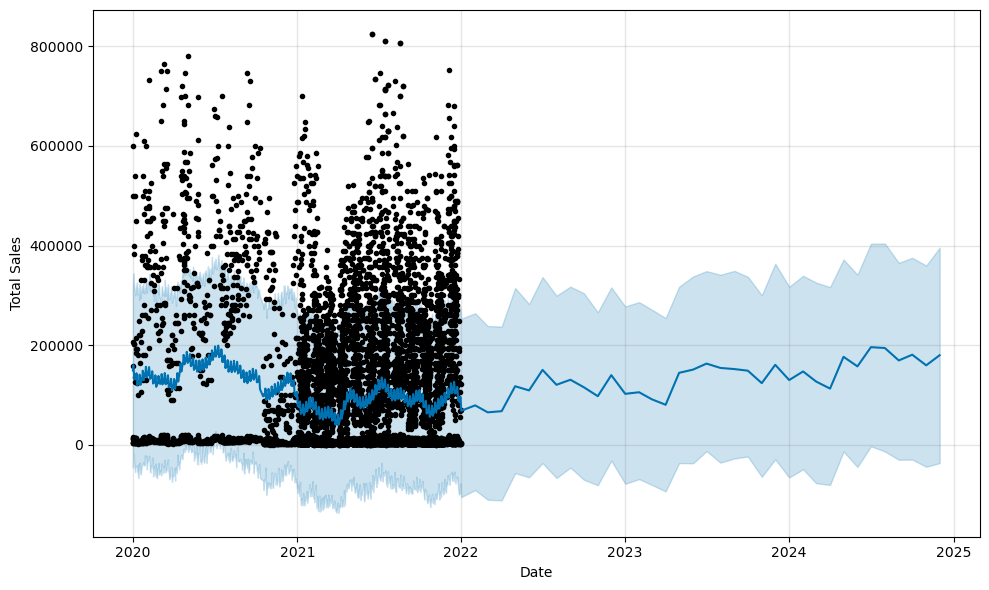

In [206]:
fig1=model.plot(forecast,xlabel='Date',ylabel='Total Sales',uncertainty=True)

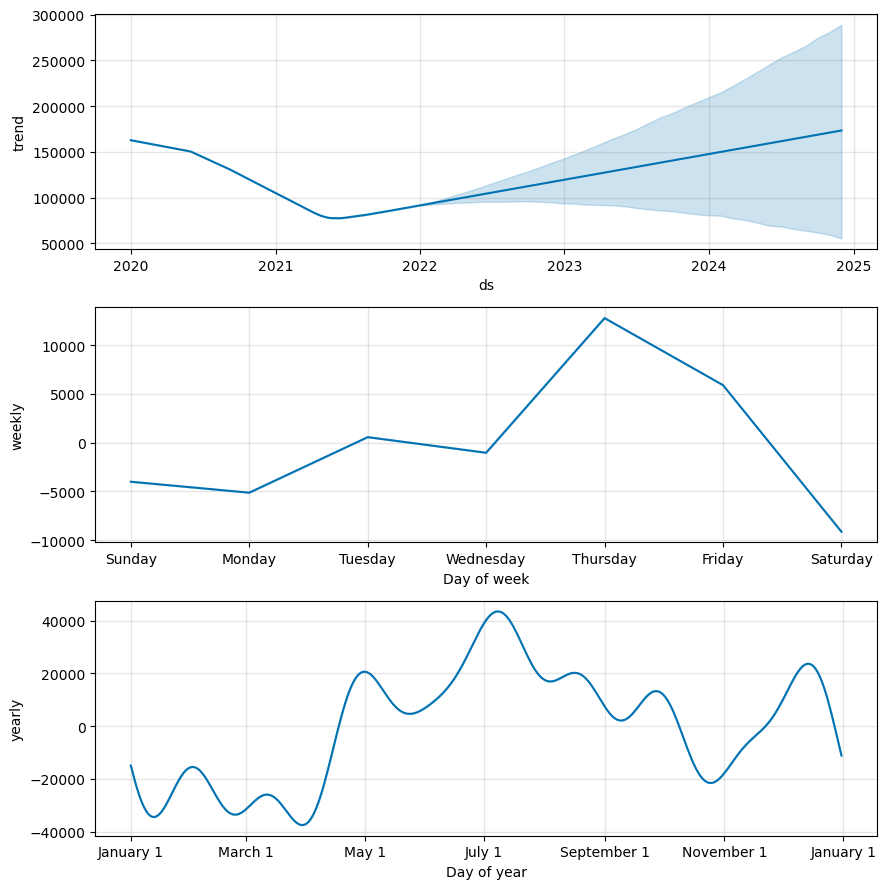

In [207]:
fig2=model.plot_components(forecast)


In [85]:
# Convert 'ds' column to datetime type
df_prophet_forecast['ds'] = pd.to_datetime(df_prophet_forecast['ds'])

In [86]:
# Join actual and predicted values
metric_prophet = forecast.set_index('ds')[['yhat']].join(df_prophet_forecast.set_index('ds').y).reset_index()
metric_prophet.dropna(inplace=True)

# Calculate RMSE
rms_prophet = mean_squared_error(metric_prophet.y, metric_prophet.yhat, squared=False)
rms_prophet

152603.3508988328

## Sales Forecasting using ARIMA

In [97]:
!pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 3.6 MB/s eta 0:00:00


In [182]:
import statsmodels.api as sm
import numpy as np

In [143]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 1200
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total_Sales       9648 non-null   float64       
 10  Operating_Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
 14  Month             9648 n

In [144]:
df_forecast['Invoice Date'] = pd.to_datetime(df_forecast['Invoice Date'])
df_forecast = df_forecast.sort_values(by=['Invoice Date'])

In [145]:
df_forecast

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total_Sales,Operating_Profit,Operating Margin,Sales Method,Year,Month,Day,weekday,forecast
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.00,0.50,In-store,2020,January,01,Wednesday,NaN
499,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,206250.0,61875.00,0.30,Outlet,2020,January,01,Wednesday,NaN
8203,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53.0,83.0,4399.0,1407.68,0.32,Outlet,2020,January,01,Wednesday,NaN
3888,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.12,0.61,Online,2020,January,01,Wednesday,NaN
7776,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34.0,384.0,13056.0,6789.12,0.52,Outlet,2020,January,01,Wednesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,Amazon,1185732,2021-12-31,Northeast,Maine,Portland,Men's Apparel,52.0,36.0,1872.0,692.64,0.37,Online,2021,December,31,Friday,NaN
498,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,70.0,175.0,122500.0,42875.00,0.35,Outlet,2021,December,31,Friday,NaN
4386,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63.0,47.0,2961.0,1362.06,0.46,Online,2021,December,31,Friday,NaN
8202,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46.0,56.0,2576.0,1004.64,0.39,Outlet,2021,December,31,Friday,NaN


In [146]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 1200
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total_Sales       9648 non-null   float64       
 10  Operating_Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
 14  Month             9648 n

In [147]:
arima_forecast=df_forecast.set_index('Invoice Date')
arima_forecast.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02',
               '2020-01-02', '2020-01-02',
               ...
               '2021-12-30', '2021-12-30', '2021-12-30', '2021-12-30',
               '2021-12-30', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='Invoice Date', length=9648, freq=None)

In [238]:
y = arima_forecast['Total_Sales'].resample('W').mean()
y.head()

Invoice Date
2020-01-05    116334.433333
2020-01-12     94594.866667
2020-01-19     67173.238095
2020-01-26    123892.871795
2020-02-02    127456.880952
Freq: W-SUN, Name: Total_Sales, dtype: float64

In [239]:
len(y)

105

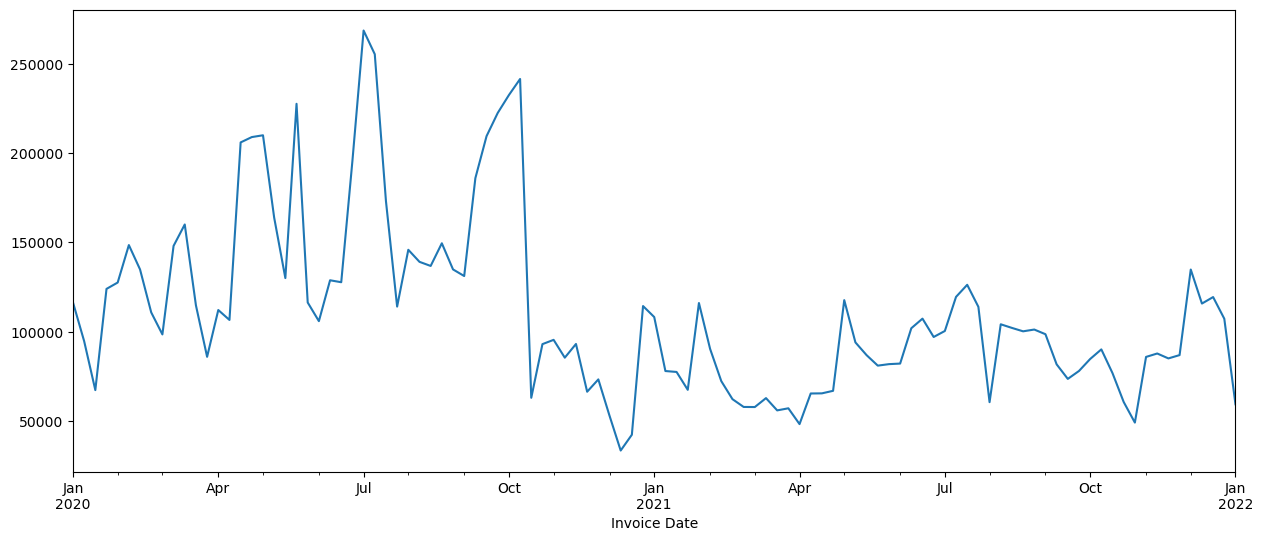

In [240]:
y.plot(figsize=(15, 6))
plt.show()

In [241]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [242]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2758.8967310748753
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2690.7885354709188
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2301.7605833993975
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2306.2118640941185
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2610.6068053705612
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2621.3724692275955
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2303.1065976079335
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2291.3763432652895
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2690.436630614397
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2680.087025706323
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2271.091877539821
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2266.5876304321714
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2675.1780514040433
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2676.4008778836987
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2270.7253180829184
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2261.044341730093
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2479.4914357864263
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2491.0035593821

In [243]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          Total_Sales   No. Observations:                  105
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1101.511
Date:                              Fri, 02 Jun 2023   AIC                           2207.022
Time:                                      18:16:14   BIC                           2212.066
Sample:                                  01-05-2020   HQIC                          2209.058
                                       - 01-02-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.0670      0.071    -15.095      0.000      -1.206      -0.928
sigma2      1.062e+

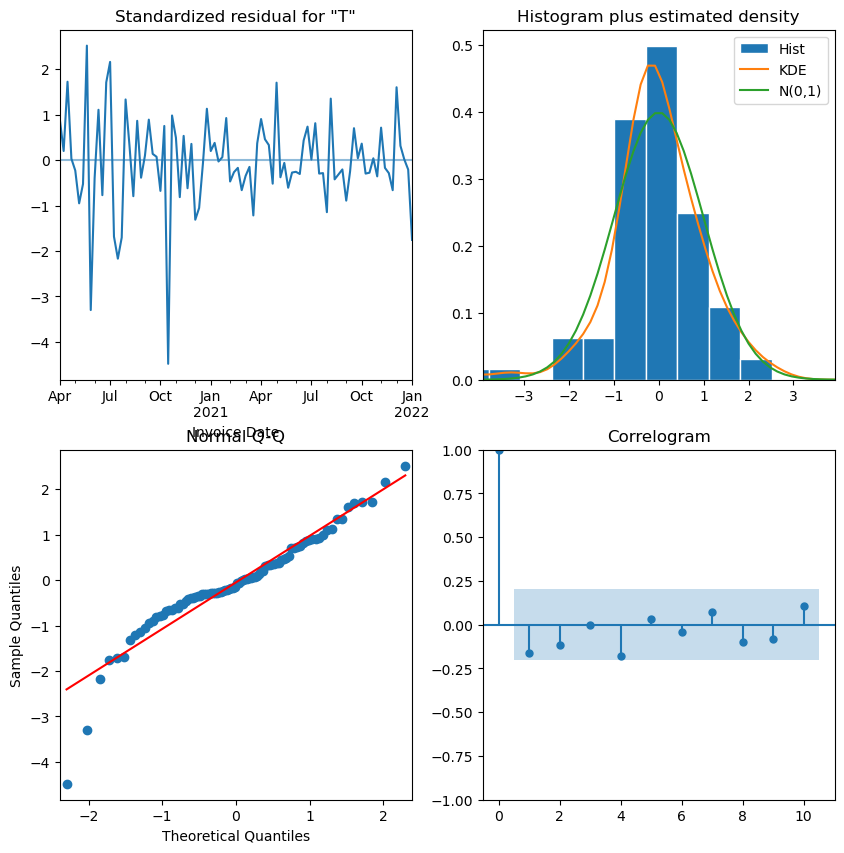

In [244]:
results.plot_diagnostics(figsize=(10, 10))
plt.show()

In [245]:
y.head(50)

Invoice Date
2020-01-05    116334.433333
2020-01-12     94594.866667
2020-01-19     67173.238095
2020-01-26    123892.871795
2020-02-02    127456.880952
2020-02-09    148451.214286
2020-02-16    134796.833333
2020-02-23    110717.857143
2020-03-01     98377.500000
2020-03-08    147988.846154
2020-03-15    159993.976190
2020-03-22    114673.692308
2020-03-29     85817.785714
2020-04-05    112046.411765
2020-04-12    106488.928571
2020-04-19    205987.478261
2020-04-26    208981.317460
2020-05-03    209986.914286
2020-05-10    163821.192308
2020-05-17    129958.428571
2020-05-24    227627.730769
2020-05-31    116270.000000
2020-06-07    105821.785714
2020-06-14    128719.428571
2020-06-21    127633.785714
2020-06-28    195655.214286
2020-07-05    268695.785714
2020-07-12    255416.928571
2020-07-19    173077.150000
2020-07-26    113981.657143
2020-08-02    145811.114286
2020-08-09    139057.428571
2020-08-16    136752.514286
2020-08-23    149459.714286
2020-08-30    134807.095238
2020-09

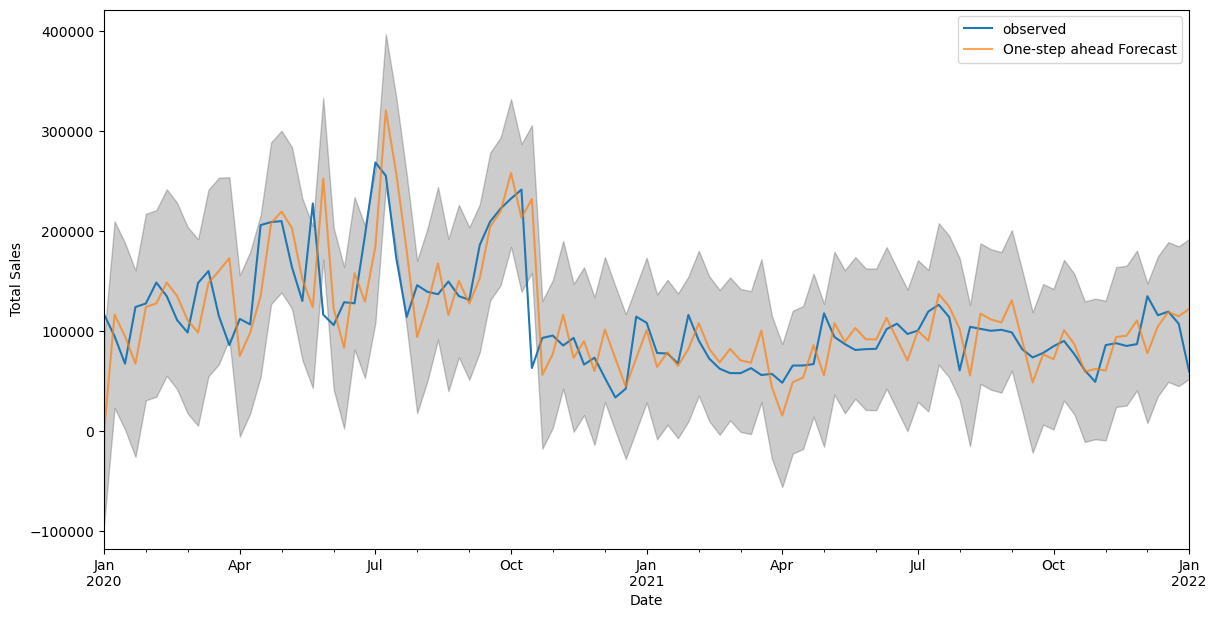

In [248]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()


In [247]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [249]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-05':]
print(forecast_accuracy(y_forecasted,y_truth))

{'mape': 0.2878631379005878, 'me': 1414.6089384849965, 'mae': 28636.04920572785, 'mpe': 0.06684131254134502, 'rmse': 40831.60859083923, 'corr': 0.6953634566839519, 'minmax': 0.21909132907387363}


C:\Users\Leon\AppData\Local\Temp\ipykernel_1284\2461056225.py:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Leon\AppData\Local\Temp\ipykernel_1284\2461056225.py:10: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Leon\AppData\Local\Temp\ipykernel_1284\2461056225.py:11: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Leon\AppData\Local\Temp\ipykernel_1284\2461056225.py:12: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [250]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-05':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1667220260.12


In [251]:
y

Invoice Date
2020-01-05    116334.433333
2020-01-12     94594.866667
2020-01-19     67173.238095
2020-01-26    123892.871795
2020-02-02    127456.880952
                  ...      
2021-12-05    134746.257143
2021-12-12    115673.064677
2021-12-19    119316.594203
2021-12-26    107168.525926
2022-01-02     59241.360000
Freq: W-SUN, Name: Total_Sales, Length: 105, dtype: float64

In [257]:
end_date = pd.to_datetime('2022-12-02')

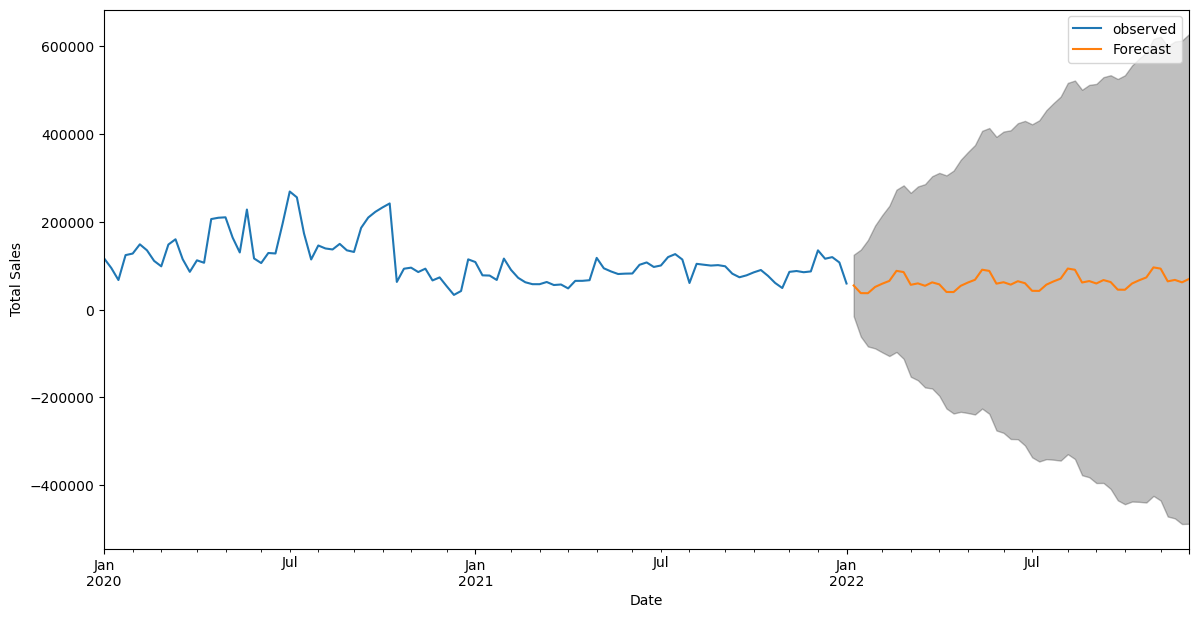

In [258]:
pred_uc = results.get_forecast(steps=end_date)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()